Author: Saviour Dan (SavyStat)

Aim: To build a logistic regression model that can effectively predict the loan status of customers
The metrics for validation of the model used in this analysis include: F1_score, Precision, Accuracy, AUC, and ROC
The odd ratio for each feature and their coefficients are also presented in this analysis

In [1]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("loanfile.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#Data Cleaning Process: Fill missing values for LoanAmount and credit_History with mean

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [9]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(542, 13)

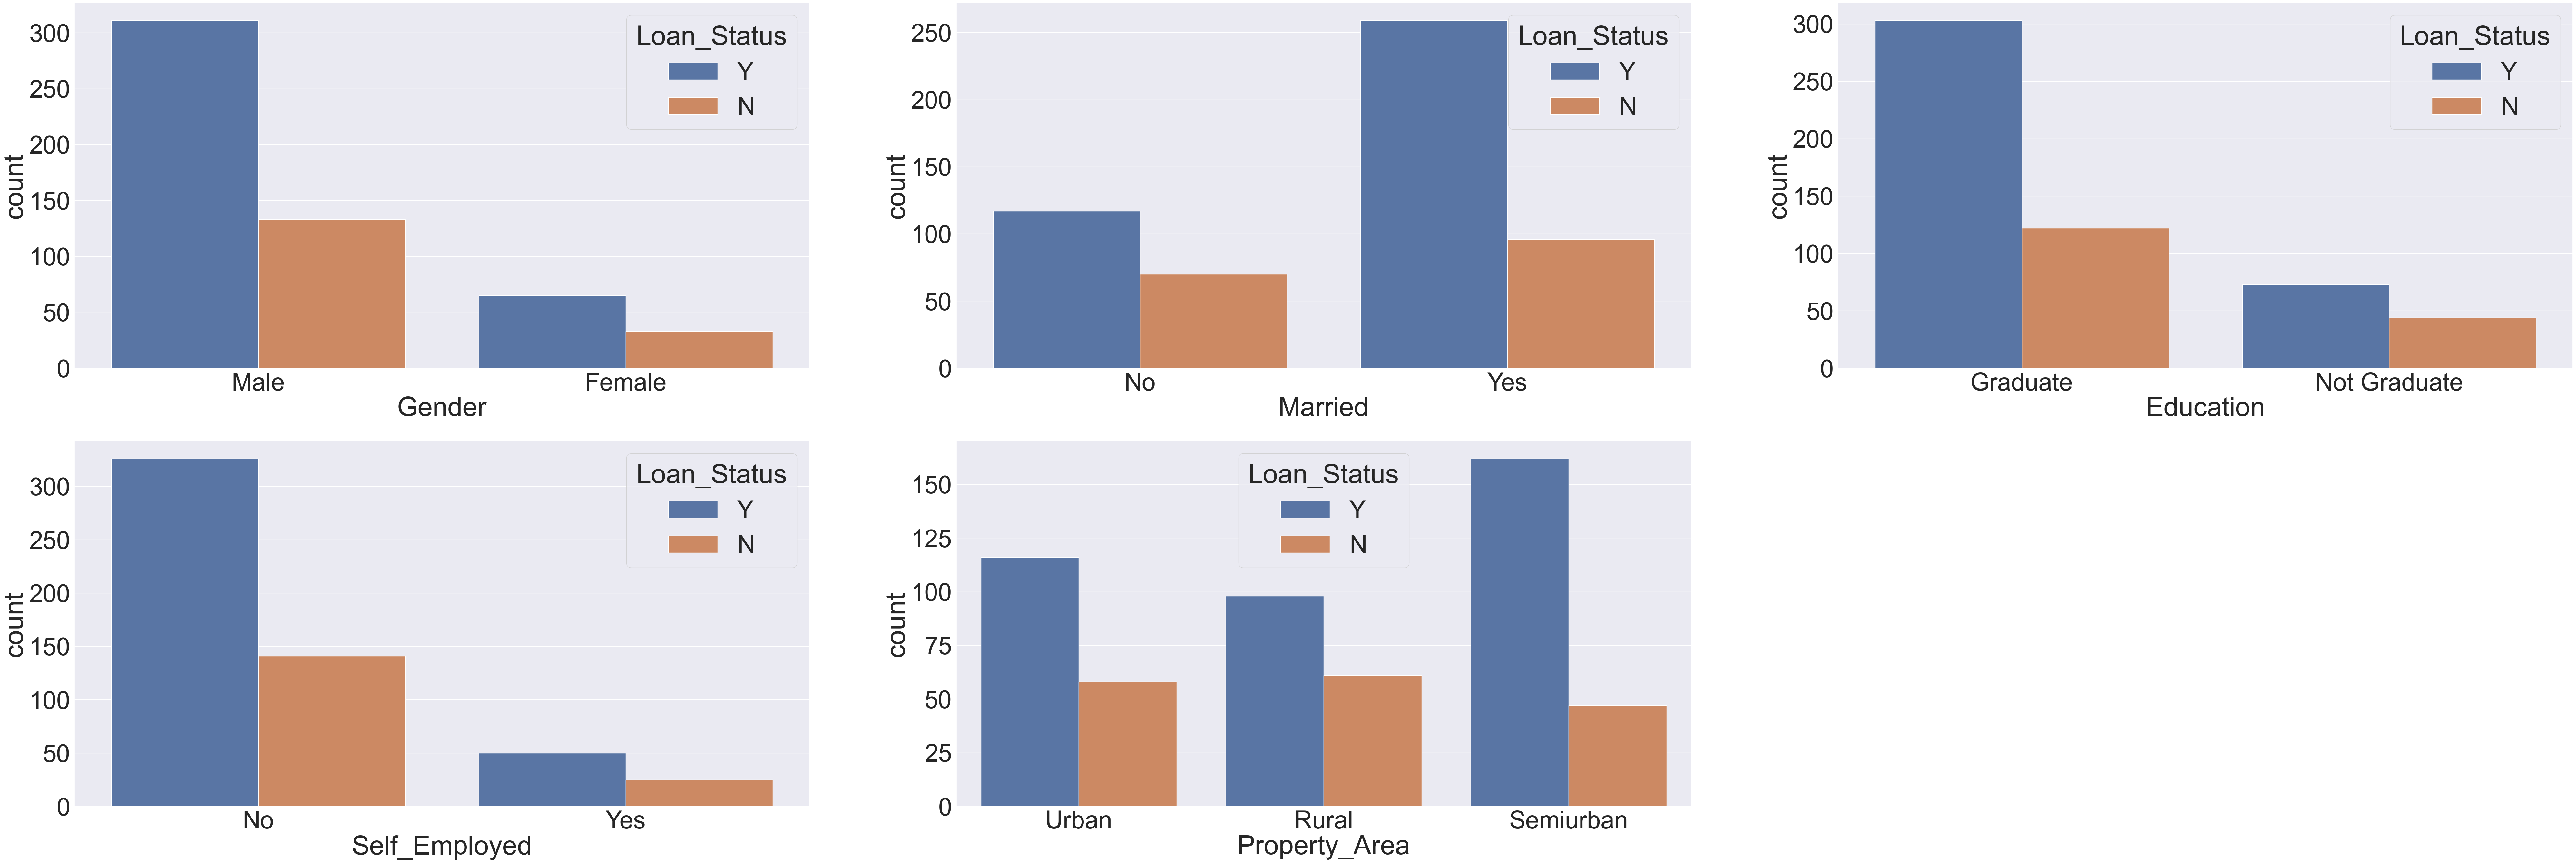

In [12]:
plt.figure(figsize=(100, 50))
sns.set(font_scale=5)

plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=df)

plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=df)

plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=df)

plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

plt.show()



In [13]:
df['Loan_Status'].replace('Y',1, inplace = True)
df['Loan_Status'].replace('N',0, inplace = True)

In [14]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [15]:
df.Gender= df.Gender.map({'Male':1, 'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [16]:
df.Married= df.Married.map({'Yes':1, 'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [17]:
df.Dependents= df.Dependents.map({'0':0, '1':1, '2': 2, '3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [18]:
df.Education = df.Education.map({'Graduate':1, 'Not Graduate':0})
df['Education'].value_counts()


Education
1    425
0    117
Name: count, dtype: int64

In [19]:
df.Property_Area= df.Property_Area.map({'Rural':0, 'Semiurban':1, 'Urban': 2})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [20]:
df.Self_Employed= df.Self_Employed.map({'Yes':1, 'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
x = df.iloc[1:542, 1:12].values
y = df.iloc[1:542, 12].values

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.3, random_state =0)

In [25]:
model = LogisticRegression()
model.fit(x_train, y_train)

lr_prediction = model.predict(x_test)
print("Logistic Regression Accuracy: ", metrics.accuracy_score(y_test, lr_prediction))

Logistic Regression Accuracy:  0.7852760736196319


In [26]:
precision = metrics.precision_score(y_test, lr_prediction)
print("Logistic Regression Precision: ", precision)

Logistic Regression Precision:  0.7591240875912408


In [27]:
f1 = metrics.f1_score(y_test, lr_prediction)
print("Logistic Regression f1_score: ", f1)

Logistic Regression f1_score:  0.8559670781893004


In [28]:
lr_pred_probabilities = model.predict_proba(x_test)[:, 1]

In [29]:
print(lr_pred_probabilities)

[0.78543932 0.22759719 0.27160626 0.78246052 0.8719914  0.84118535
 0.72968711 0.8106914  0.85816943 0.81057493 0.85431095 0.61970044
 0.80033625 0.73019305 0.27807681 0.73097375 0.73483661 0.88142099
 0.8482974  0.87083999 0.77584077 0.86288701 0.66726422 0.81755208
 0.81391518 0.69997132 0.80997632 0.81686204 0.83264866 0.17155246
 0.87897616 0.52090033 0.30114606 0.09107134 0.51179919 0.74562209
 0.25733697 0.82075875 0.84907224 0.70393257 0.77021702 0.3000842
 0.19107525 0.86246452 0.81976383 0.69120089 0.76486472 0.59274573
 0.87140219 0.44012109 0.73546742 0.86962499 0.22621137 0.83615654
 0.83349035 0.87113035 0.11685049 0.86038571 0.56924912 0.88418652
 0.86283694 0.67325799 0.86126167 0.2727278  0.73387833 0.63594487
 0.7717784  0.85861377 0.71375275 0.18439935 0.81006039 0.81987571
 0.68805666 0.86650337 0.85887747 0.82759388 0.67926772 0.84008585
 0.81979684 0.84604287 0.80643842 0.73671585 0.24905102 0.82947245
 0.77169345 0.83735722 0.74422214 0.88950841 0.37037516 0.93407

In [30]:
roc_auc = metrics.roc_auc_score(y_test, lr_pred_probabilities)
log_loss = metrics.log_loss(y_test, lr_pred_probabilities)
print("The ROC (Receiver Operating Characteristic): ", roc_auc)
print("The AUC (Area Under the Curve): ", log_loss)

The ROC (Receiver Operating Characteristic):  0.714498510427011
The AUC (Area Under the Curve):  0.5413461628763725


In [31]:
print('Loan status prediction for trained data: ' , lr_prediction) 


Loan status prediction for trained data:  [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]


In [32]:
feature_names = df.columns[1:-1]  

# Get the coefficients (parameters) of the logistic regression model
coefficients = model.coef_[0]

# Create a data frame to store the coefficients and corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate the odds ratios by exponentiating the coefficients
coef_df['Odds Ratio'] = np.exp(coef_df['Coefficient'])

# Print or display the DataFrame
print(coef_df)

              Feature  Coefficient  Odds Ratio
0              Gender     0.117942    1.125179
1             Married     0.403391    1.496891
2          Dependents    -0.271102    0.762539
3           Education     0.657847    1.930632
4       Self_Employed    -0.038987    0.961763
5     ApplicantIncome    -0.000015    0.999985
6   CoapplicantIncome    -0.000069    0.999931
7          LoanAmount    -0.000621    0.999379
8    Loan_Amount_Term    -0.004527    0.995484
9      Credit_History     2.431141   11.371850
10      Property_Area     0.099192    1.104279


In [33]:
!pip install nbconvert